<a href="https://colab.research.google.com/github/Junoflows/Deeplearning_From_Scatch2/blob/main/Chapter_3_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 word2vec

+ 앞서 통계 기반 기법으로 단어의 분산 표현을 얻었는데 이번에는 더 강력한 기법인 추론 기반 기법을 살펴보자.

## 3.1 추론 기반 기법과 신경망

+ 단어를 벡터로 표현하는 방법에는 크게 통계 기반 기법과 추론 기반 기법이 있다.
+ 앞서 본 통계 기반 기법의 문제를 지적하고 그 대안인 추론 기반 기법의 이점을 살펴보자.
+ word2vec의 전처리를 위해 신경망으로 단어를 처리하는 예를 살펴보자.

### 3.1.1 통계 기반 기법의 문제점

+ 통계 기반 기법에서는 주변 단어의 빈도를 기초로 단어를 표현했다.
+ 단어의 동시발생 행렬을 만들고 SVD를 적용하여 밀집벡터를 얻었다.
+ 이 방식은 대규모 말뭉치를 다룰 때 문제가 발생한다.
+ 영어의 어휘 수는 100만이 넘는데, 이를 통계 기반 기법에서는 100만×100만이라는 행렬을 만들게 된다.
+ 여기에 SVD를 적용하는 일은 현실적이지 않다.


+ 통계 기반 기법은 말뭉치 전체의 통계를 이용해 단 1회의 처리만에 단어의 분산 표현을 얻는다.
+ 추론 기반 기법에서 신경망을 이용하는 경우는 미니배치로 학습하는 것이 일반적이다.
+ 아래 그림은 두 기법의 차이를 보여준다.

<img src='http://drive.google.com/uc?export=view&id=1TtNewPZkM3sc80gVjmDTuMOr9F_mHL0h' width = 550/><br>

+ 위처럼 통계 기반 기법은 학습 데이터를 한꺼번에 처리한다.(배치 학습)
+ 추론 기반 기법은 학습 데이터의 일부를 사용해 순차적으로 학습한다.(미니배치 학습)
+ 즉 말뭉치의 어휘 수가 많아 계산량이 큰 작업을 처리하기 어려운 경우도 신경망을 학습시킬 수 있다는 뜻이다.
+ 여러 머신과 GPU를 이용한 병렬 계산도 가능해져서 학습 속도를 높일 수도 있다.

### 3.1.2 추론 기반 기법 개요

+ 추론이 주된 작업으로, 추론이란 아래처럼 주변 단어가 주어졌을 때 ? 에 무슨 단어가 들어갈 지 추측하는 작업이다.

<img src='http://drive.google.com/uc?export=view&id=1mra4EEP5SR1BXDV16o4U-rADXRQhYOQD' width = 550/><br>

+ 추론 문제를 풀고 학습하는 것이 추론 기반 기법이 다루는 문제이다.
+ 추론 문제를 반복해서 풀면서 단어의 출현 패턴을 학습하는 것이다.
+ 모델 관점에서 보면 추론 문제는 아래처럼 보인다.

<img src='http://drive.google.com/uc?export=view&id=1EkQ088S4hRO9P8Wu0w9w19YGZ0owLQ9I' width =550/><br>

+ 위에서 보듯 추론 기반 기법에는 모델이 등장하는데 모델로 신경망을 사용한다.
+ 모델은 맥락 정보를 입력받아 각 단어의 출현 확률을 출력한다.
+ 이러한 틀 안에서 말뭉치를 사용해 모델이 올바른 추측을 내놓도록 학습시킨다.
+ 이 학습의 결과로 단어의 분산 표현을 얻는 것이 추론 기반 기법의 전체 그림이다.

### 3.1.3 신경망에서의 단어 처리

+ 신경망은 you와 say 등의 단어를 처리할 수 없으니 단어를 고정 길이 벡터로 변환해야 한다.
+ 이때 벡터의 원소 하나만 1이고 나머지는 0인 벡터로 하는 원핫 벡터로 변환하는 방법을 사용한다.
+ You say goodbye and I say hello. 라는 문장을 원핫 벡터에 대해 살펴보자.
+ ("you", "say", "goodbye", "and", "I", "hello",".") 이중 두 단어의 원핫 벡터를 나타내면 아래와 같다.

<img src='http://drive.google.com/uc?export=view&id=1NfVLVqlVVNw886QBJVjWmipzHIdhhF6D' width = 550/><br>

+ 단어를 원핫 벡터로 변환하는 방법은 총 어휘 수만큼 원소를 갖는 벡터를 준비하고  
인덱스가 단어 ID와 같은 원소를 1, 나머지를 0으로 설정한다.
+ 이처럼 단어를 고정 길이 벡터로 변환하면 신경망의 입력층은 뉴런의 수를 고정할 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1TaezhpshVAi1_UkpHPPpDRb192n-m9eK' width = 550 /><br>

+ 위 그림처럼 입력층의 뉴런은 총 7개이고, 차례로 7개의 단어들에 대응한다.
+ 즉 단어를 벡터로 나타낼 수 있고, 신경망을 구성하는 계층들은 벡터를 처리할 수 있으니 단어를 신경망으로 처리할 수 있다는 뜻이다.
+ 아래 그림은 원핫 표현으로 된 단어 하나를 완전연결계층을 통해 변환하는 모습을 보여준다.

<img src='http://drive.google.com/uc?export=view&id=1Jrm_gW7F7cJeD91B-z3ZHCUtYKiKQL0c' width =550/><br>

+ 신경망은 완전연결계층이므로 각각의 노드가 이웃 층의 모든 노드와 화살표로 연결되어 있다.
+ 화살표에는 가중치가 존재하여, 입력층 뉴런과의 가중합이 은닉층 뉴런이 된다.
+ 앞으로 가중치를 명확하게 보여주기 위해 다음과 같이 그린다.

<img src='http://drive.google.com/uc?export=view&id=1lMrJl_Q4Yzgme7ugzRivx5I3v16WNvT0' width =550 /><br>

+ 지금까지 내용을 코드로 살펴보자.
+ 완전연결계층의 의한 변환은 파이썬으로 다음과 같다.

In [ ]:
import numpy as np

c = np.array([1, 0, 0, 0, 0, 0, 0])   # 입력
W = np.random.randn(7, 3)             # 가중치
h = np.matmul(c, W)                   # 중간 노드
print(h)

[ 0.03487317 -0.61523164 -0.10167472]


+ 단어 ID가 0인 단어를 원핫 표현으로 표현한 후 완전연결계층을 통과시켜 반환하였다.
+ c는 원핫 표현이므로 단어 ID에 대응하는 원소만 1이고 그 외에는 0인 벡터이다.
+ c와 W의 행렬 곱은 아래처럼 가중치의 행벡터 하나를 뽑아낸 것과 같다.

<img src='http://drive.google.com/uc?export=view&id=1_8D1GKYjZf4gNYMDh96L5W8Nmq5pUu4V' width = 550/><br>

+ 앞의 코드로 수행한 작업은 1장에서 구현한 MatMul 계층으로도 수행할 수 있다.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-2-master')
import numpy as np
from common.layers import MatMul

c = np.array([1, 0, 0, 0, 0, 0, 0])
W = np.random.randn(7, 3)
layer = MatMul(W)
h = layer.forward(c)
print(h)

[ 0.50006898  0.11183846 -0.14706295]


+ MatMul 계층에 가중치 W를 설정하고 forward()를 호출해 순전파를 수행한다.

## 3.2 단순한 word2vec

+ word2vec을 구현해보자.
+ 여기서 사용할 신경망은 word2vec에서 제안하는 CBOW 모델이다.

### 3.2.1 CBOW 모델의 추론 처리

+ CBOW 모델은 맥락으로부터 타겟을 추측하는 용도의 신경망이다.(타겟:중앙단어, 맥락:주변단어)
+ CBOW 모델이 가능한 한 정확하게 추론하도록 훈련시켜서 단어의 분산 표현을 얻어낸다.
+ CBOW 모델의 입력은 맥락으로 you, goodbye 같은 단어들의 목록이다.
+ 이 맥락을 원핫 벡터로 변환하여 CBOW 모델이 처리할 수 있도록 한다.

<img src='http://drive.google.com/uc?export=view&id=1yJTYo-sTdpBto2HamqpmJw43gt8hxBg8' width = 550/><br>

+ 위 그림은 CBOW 모델의 신경망으로 입력층이 2개 있고, 은닉층을 거쳐 출력층에 도달한다.
+ 두 입력층에서 은닉층으로의 변환은 같은 완전연결계층이 처리한다.
+ 은닉층에서 출력층 뉴런으로의 변환은 다른 완전연결계층이 처리한다.

__NOTE__ <br/>
입력층이 2개인 이유는 맥락으로 고려할 단어를 2개로 정했기 떄문이다.

+ 은닉층의 뉴런은 입력층의 완전연결계층에 의해 변환된 값이 되는데, 입력층이 여러 개이면 전체를 평균하면 된다.
+ 앞의 예에 대입해보면 다음과 같다.
+ 완전연결계층에 의한 첫 번째 입력층이 $h_1$으로 변환되고 두 번째 입력층이 $h_2$로 변환되었으면  
은닉층 뉴런은 $\frac{1}{2}(h_1+h_2)$가 된다.

+ 출력층을 살펴보면 뉴런은 총 7개인데, 이 뉴런 하나하나가 각각의 단어에 대응한다.
+ 츨력층의 뉴런은 각 단어의 점수를 뜻하며, 값이 높을수록 대응 단어의 출현 확률도 높아진다.
+ 여기서 점수를 소프트맥스 함수를 적용하여 확률을 얻을 수 있다.

+ 입력층에서 은닉층으로의 변환은 완전연결계층에 의해 이뤄지고 이때 가중치 $W_{in}$은 7×3 행렬이다.
+ 이 가중치가 단어의 분산 표현이다.

<img src='http://drive.google.com/uc?export=view&id=1s4iQQvaSPk4UIU1kLh22Izbt2pzEcgCp' width= 550 /><br>

+ 가중치 $W_{in}$의 각 행에는 해당 단어의 분산 표현이 담겨있어서  
학습이 진행될수록 맥락의 단어를 잘 추측하는 방향으로 분산 표현들이 갱신된다.
+ 이렇게 해서 얻은 벡터는 단어의 의미도 잘 나타낸다.

+ 지금까지 CBOW 모델을 뉴런 관점에서 살펴보았는데 이번에는 계층 관점에서 살펴보자.

<img src='http://drive.google.com/uc?export=view&id=1b7fJc0hos4TjEi4v7zbNn1f7NKiMxDcD' width = 550/><br>

+ CBOW 모델의 가장 앞에는 2개의 MatMul 계층이 있고 이 두 계층의 출력이 더해진다.
+ 더해진 값의 0.5를 곱하여 생긴 평균이 은닉층의 뉴런이 된다.
+ 은닉층 뉴런에 MatMul 계층이 적용되어 점수가 출력된다.

+ 위 그림을 참고하여 CBOW 모델의 추론 처리를 파이썬으로 구현해보자.

In [ ]:
# coding: utf-8
import sys
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-2-master')
import numpy as np
from common.layers import MatMul


# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(s)

[[ 1.57879104  0.40983182 -0.81408926  0.43445798 -0.45221447  0.13664619
   0.24453247]]


+ 먼저 필요한 가중치들을 초기화한 후, 입력층을 처리하는 MatMul 계층을 맥락 수 만큼 생성한다.
+ 출력층에는 MatMul 계층을 1개만 생성하고, 입력층의 MatMul 게층은 $W_{in}$ 가중치를 공유한다.
+ 입력층의 MatMul 계층들의 forward()를 호출해 중간 데이터를 계산하고 출력층 MatMul 계층을 통과시켜 각 단어의 점수를 구한다.
+ 이상이 CBOW 모델의 추론 과정이며 계속해 CBOW 모델의 학습에 대해 알아보자.

### 3.2.2 CBOW 모델의 학습

+ CBOW 모델의 출력층에서 각 단어의 점수를 출력하였고 소프트맥스 함수를 적용하면 확률을 얻을 수 있다.
+ 이 확률은 맥락이 주어졌을 때 중앙에 어떤 단어가 나오는지를 나타낸다.

+ 아래의 예에서 맥락은 you, goodbye 이고 정답레이블은 say이다.
+ 가중치가 잘 설정된 신경망에서 뉴런의 값이 가장 큰 것이 정답을 나타내는 뉴런이라고 예상할 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1yfSSnA0y0TbEDlID2BRx5h0883JDjNw6' width = 550/><br>

+ CBOW 모델의 학습에서는 올바른 예측을 할 수 있도록 가중치를 조정한다.  
+ 가중치 $W_{in}$에 단어의 출현 패턴을 파악한 벡터가 학습된다.

+ CBOW 모델로 얻을 수 있는 단어의 분산 표현은 의미와 문법 측면에서 우리의 직관에 부합한다.

+ 다중 클래스 분류를 수행하는 신경망을 학습하려면 소프트맥스와 교차 엔트로피 오차를 이용한다.
+ 소프트맥스 함수를로 점수를 확률로 변환하고, 이 확률과 정답 레이블의 교차 엔트로피 오차를 구한 후  
그 값을 손실로 사용해 학습을 진행한다.

<img src='http://drive.google.com/uc?export=view&id=1YkxKVqBxy8OONzI7FGqSgRQB-cp5yDa3' width = 550/><br>

+ 앞서 추론 처리 CBOW 모델에 Softmax 계층과 Cross Entropy Error 계층만 추가했다.
+ 이것만으로 손실을 얻을 수 있고, 이상이 CBOW 모델의 손실을 구하는 과정이며 순방향 전파이다.
+ Softmax 계층과 Cross Entropy Error 계층을 Softmax with Loss 라는 하나의 계층으로 구현하자.

<img src='http://drive.google.com/uc?export=view&id=1nKueyb3e-K8CRwtOERXLnYfJi1hrBCEb' width = 550/><br>

### 3.2.3 word2vec의 가중치와 분산 표현

+ word2vec에 사용되는 신경망은 입력층 가중치 $W_{in}$과 출력층 가중치 $W_{out}$ 두 가지가 있다.
+ $W_{in}$의 행이 각 단어의 분산 표현에 해당하고 $W_{out}$에도 단어의 의미가 인코딩된 벡터가 저장되어 있다.
+ 출력 측 가중치는 각 단어의 분산 표현이 열 방향으로 저장된다.

<img src='http://drive.google.com/uc?export=view&id=1nSFsRE5B0kdlH34E6DlooSMEOG7w_Gcj' width = 550/><br>

+ 최종적으로 이용하는 단어의 분산 표현으로는 입력 측의 가중치만 이용하는게 가장 대중적인 선택이다.
+ 따라서 $W_{in}$을 단어의 분산 표현으로 이용한다.

## 3.3 학습 데이터 준비

+ word2vec 학습에 쓰일 학습 데이터를 준비하기 앞서 간단한 예로  
You say goodbye and I say hello 라는 한 문장 말뭉치를 이용해보자.

### 3.3.1 맥락과 타깃

+ word2vec에서 신경망의 입력은 맥락이고 정답 레이블은 맥락에 싸인 중앙의 단어, 타겟이다.
+ 우리는 신경망에 맥락을 입력했을 때 타깃이 출현할 확률을 높이도록 학습해야 한다.

<img src='http://drive.google.com/uc?export=view&id=1T5F79adBaOanE0THTegXLWDVqOREGFzW' width = 550/><br>

+ 말뭉치에서 목표단어를 타깃으로 주변 단어를 맥락으로 뽑았다.
+ 이 작업을 말뭉치 안의 모든 단어에 대해 수행한 결과가 오른쪽의 맥락과 타깃이다.
+ 맥락의 각 행이 신경망의 입력으로, 타깃의 각 행이 정답 레이블이 된다.
+ 각 샘플 데이터에서 맥락의 수는 window_size로 설정할 수 있고(예에서는 2개) 타깃은 하나이다.


+ 말뭉치로부터 맥락과 타깃을 만드는 함수를 구현해보자.
+ 말뭉치 텍스트를 단어 ID로 변환해야 하는데 앞서 2장에서 구현한 preprocess 함수를 사용한다.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-2-master')
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


+ 단어의 ID 배열인 corpus로부터 맥락과 타깃을 만들어낸다.

<img src='http://drive.google.com/uc?export=view&id=16mwvuh7e00L6IHVQeu-YgjO_UKn6j2J5' width= 550/><br>

+ 맥락은 2차원 배열이고 맥락의 0번째 차원에는 각 맥락 데이터가 저장된다.
+ 즉 contexts[i]에는 i번째 맥락이 저장되고 마찬가지로 타깃에서도 target[i]에 i번째 타깃이 저장된다.

+ 이 맥락과 타깃을 만드는 함수를 구현해보자.

In [ ]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)

+ 이 함수는 단어 ID의 배열(corpus), 맥락의 윈도우 크기(window_size) 두 개의 인수를 받는다.
+ 맥락과 타깃을 각각 넘파이 다차원 배열로 저장한다.
+ 이 함수를 사용해보면 다음과 같다.

In [ ]:
contexts, target = create_contexts_target(corpus, window_size = 1)
print(contexts)
print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


+ 이것으로 말뭉치엣 맥락과 타깃을 만들었고 이를 CBOW 모델에 넘겨주면 된다.
+ 맥락과 타깃의 각 원소가 단어 ID이므로 이를 원핫 표현으로 변환하자.

### 3.3.2 원핫 표현으로 변환

+ 맥락과 타깃을 원핫 표현으로 바꾸는 과정은 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1O9jrjI75qbopULC7zPadyK3xxBnxW0OG' width = 550/><br>

+ 맥락과 타깃을 단어 ID에서 원핫 표현으로 변환하는데 각각 다차원 배열의 형상을 살펴보자.
+ 단어 ID에서의 맥락의 형상은 (6,2)인데 원핫으로 표현하면 (6,2,7)이 된다.


+ 원핫 표현으로 변환은 convert_one_hot() 함수를 사용하며 인수로는 단어 ID 목록과 어휘 수를 받는다.
+ 지금까지의 데이터 준비 과정을 모아서 정리해보자.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-2-master')
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size = 1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

## 3.4 CBOW 모델 구현

+ 앞서 보았듯이 우리가 구현할 신경망은 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=18LSGfXlO1jmd3nqAkrpbn26FCxcZM0fn' width = 550/><br>

+ 위 신경망을 SimpleCBOW 라는 이름으로 구현한다.
+ 초기화 메서드부터 시작해보자.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-2-master')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

+ 초기화 메서드는 인수로 어휘 수와 은닉층의 뉴런 수를 받는다.
+ 가중치 초기화에서는 가중치 2개를 작은 무작위 값으로 초기화하여 32비트 부동소수점 수로 생성한다.
+ 입력층의 MatMul 계층을 2개, 출력층의 MatMul 계층을 하나, Softmax with Loss 계층을 하나 생성한다.
+ 입력층의 맥락을 처리하는 MatMul 계층은 맥락에서 사용하는 단어의 수(윈도우 크기)만큼 만들어야 한다.
+ 입력층의 MatMul 계층들은 같은 가중치를 이용하도록 초기화한다.
+ 마지막으로 신경망에서 사용되는 매개변수와 기울기를 params와 grads 리스트에 각각 모은다.

+ 이어서 순전파인 forward()를 구현한다.
+ 인수로 맥락(contexts)과 타깃(target)을 받아서 손실(loss)을 반환한다.

In [ ]:
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

+ 역전파인 backward()를 구현하자.
+ 역전파의 계산 그래프는 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1oK2XKlbonYHZsVCwnbh1NLEjv2U8N8nq' width =550 /><br>

+ 역전파는 1에서 시작하여 바로 Softmax with Loss 계층에 입력된다.
+ Softmax with Loss 계층의 역전파 출력이 ds이며 이를 출력층 MatMul 계층으로 입력한다.
+ 그 후 ×와 + 연산으로 역전파된다.
+ ×는 순전파 시 입력을 서로 바꿔 기울기에 곱하고 +는 기울기를 그대로 통과시킨다.

In [ ]:
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

+ 이것으로 역전파 구현까지 마쳤다.
+ 각 매개변수의 기울기를 grads에 모아뒀으므로 forward() 호출한 후 backward()를 호출하는 것 만으로 grads 리스트의 기울기가 갱신된다.
+ SimpleCBOW 클래스의 학습을 살펴보자.

### 3.4.1 학습 코드 구현

+ CBOW 모델의 학습은 일반적인 신경망의 학습과 완전히 같다.
+ 학습 데이터를 준비해 신경망에 입력한 다음 기울기를 구하고가중치 매개변수를 순서대로 갱신해간다.
+ 이번 학습 과정을 수행하는데 1장에서의 Trainer 클래스를 사용한다.

+ 매개변수 갱신 방법으로는 Adam을 사용했다.

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


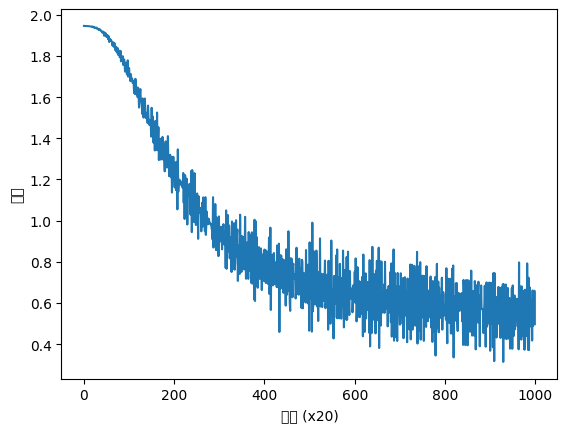

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-2-master')
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

+ 학습을 거듭할수록 손실이 줄어드는 것을 알 수 있다.
+ 학습이 끝난 후 가중치 매개변수를 살펴보자.
+ 입력층 MatMul 계층의 가중치를 꺼내 실제 내용을 확인해보자.

In [ ]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.0135729  1.0294467 -1.0343095  1.2663658  1.3385414]
say [-1.2501268  -1.247404    1.2725587  -0.10856082  0.04438563]
goodbye [ 0.98090607  1.0015186  -0.90608174  0.58291394  0.48628062]
and [-1.0862287 -1.1125846  1.1349623 -1.5972226 -1.6234853]
i [ 0.9672954   0.9858275  -0.91421175  0.5812488   0.48802358]
hello [ 1.044033   1.0417709 -1.0133272  1.2602041  1.3545943]
. [-1.0225208 -0.9248858  1.040392   1.4062419  1.4054738]


+ word_vecs로 가중치를 꺼내는데 각 행에는 대응하는 단어 ID의 분산 표현이 저장돼 있다.

+ 이로써 단어를 밀집벡터로 나타냈는데 이 밀집벡터가 단어의 분산 표현이다.
+ 하지만 작은 말뭉치로는 좋은 결과를 얻을 수 없다.
+ 큰 말뭉치로 바꾸면 결과는 좋아지지만 처리 속도에서 문제가 생기게 되는데 4장에서 CBOW 모델을 개선하여 구현할 예정이다.

## 3.5 word2vec 보충

+ 이번에는 word2vec에 관한 중요한 주제 몇 가지를 살펴보자.
+ 우선 CBOW 모델을 확률 관점에서 다시 살펴보자.

### 3.5.1 CBOW 모델과 확률

+ 우선 확률 표기법을 간단하게 살펴보자.
+ A라는 현상이 일어날 확률은 P(A)로 쓰고, 동시 확률은 P(A, B)로 쓴다.
+ 사후 확률은 B가 주어졌을 때 A가 일어날 확률로 P(A | B)로 쓴다.

+ CBOW 모델을 확률 표기법으로 기술해보자.
+ CBOW 모델이 하는 일은 맥락을 주면 타깃 단어가 출현할 확률을 출력하는 것이다.
+ 말뭉치를 $w_1, w_2, ... , w_r$처럼 단어 시퀀스로 표기하고 t번쨰 단어에 대해 윈도우 크기가 1인 맥락을 고려한다.

<img src='http://drive.google.com/uc?export=view&id=1vQuM1ZmE3jZ2F6l-Xg1LpLW5abcfLy6B' width =550 /><br>

+ 맥락으로 $w_{t-1}, w_{t+1}$이 주어졌을 때 $w_t$가 타깃이 될 확률을 수식으로 쓰면 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1ZZk-4AekpOYQ69x-483iAYVpAX08vbJD' width = 550 /><br>

+  $w_{t-1}, w_{t+1}$가 주어졌을 때  $w_t$가 일어날 확률을 뜻한다.
+ 즉 CBOW는 위 식을 모델링 하고 있는 것이다.

+ 위 식을 이용하면 CBOW 모델의 손실 함수도 간결하게 표현할 수 있다.
+ 교차 엔트로피 식을 적용해보자.

$ \huge L= -Σ_t t_klog y_k$

+ 이때 $y_k$는 k번째에 해당하는 사건이 일어날 확률이다.
+ $t_k$는 정답 레이블이며 원핫 벡터로 표현된다.
+ 여기서 문제의 정답은 $w_t$가 발생하는 것이므로 $w_t$에 해당하는 원소만 1이고 나머지는 0이 된다.
+ 즉 다음 식을 유도할 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1R4nqbAkNihfF1zs7RcVNNi5yqQe35HDa' width = 550/><br>

+ CBOW 모델의 손실 함수는 단순히 [식 3.1] 확률에 log를 취한 후 마이너스를 붙이면 된다.
+ 이를 음의 로그 가능도 라고 한다.
+ 이를 말뭉치 전체로 확장하면 다음 식이 된다.

<img src='http://drive.google.com/uc?export=view&id=1g0BVcWh27CIk_W_iNj2QqIl-T9YBj936' width = 550/><br>

+ CBOW 모델의 학습이 수행하는 일은 이 손실 함수의 값을 가능한 작게 만드는 것이다.
+ 이때 가중치 매개변수가 우리가 얻고자 하는 단어의 분산 표현이다.

### 3.5.2 skip-gram 모델

+ word2vec은 2개의 모델을 제안하는데 하나는 CBOW 모델이고 다른 하나는 skip-gram 모델이다.
+ skip-gram은 CBOW에서 다루는 맥락과 타깃을 역전시킨 모델이다.

<img src='http://drive.google.com/uc?export=view&id=1Vr1Ck9NP1x5tLIxoym0ISIC7dXA5GYqX' width = 550/><br>

+ CBOW 모델은 맥락이 여러 개 있고 여러 맥락으로부터 중앙 단어인 타깃을 추측한다.
+ skip-gram 모델은 중앙 단어인 타깃으로부터 주변의 여러 단어인 맥락을 추측한다.
+ skip-gram의 신경망 구성은 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1PX9fGmmYI_iKg-RdovvmO5gkhidX23Hi' width = 550/><br>

+ skip-gram 모델의 입력층은 하나이고 출력층은 맥락의 수만큼 존재한다.
+ 따라서 각 출력층에서 개별적으로 손실을 구하고 이 개별 손실들을 모두 더한 값을 최종 손실로 한다.

+ skip-gram 모델의 확률 표기로 나타내보자.
+ 타깃 $w_t$로부터 맥락 $w_{t-1}, w_{t+1}$을 추축하는 경우를 생각해보면 다음 식을 모델링하게 된다.

<img src='http://drive.google.com/uc?export=view&id=1FEM-7GS0PehDXFPfwtzN8ohRzebOitxd' width = 550/><br>

+ 위 식은 $w_t$가 주어졌을 떄 $w_{t-1}, w_{t+1}$이 동시에 일어날 확률을 뜻한다.
+ skip-gram 모델에서는 맥락의 단어들 사이에 관련성이 없다고 가정하고 다음과 같이 분해한다.

<img src='http://drive.google.com/uc?export=view&id=1jFbINLxvO-FOR3QaMUsZf_XfEukzv0aw' width = 550/><br>

+ 위 식을 교차 엔트로피 오차에 적용하여 skip-gram 모델의 손실 함수를 유도할 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1ayNxRQuedMS6Z5QInxaPXlDo0-mtU29q' width = 550 /><br>

+ skip-gram 모델의 손실 함수는 맥락별 손실을 구한 후 모두 더한다.
+ 이를 말뭉치 전체로 확장하면 skip-gram 모델의 손실 함수는 다음 식이 된다.

<img src='http://drive.google.com/uc?export=view&id=1Pp80FMg7ISsebqi8l-LhZ3vDvpJ9IQYr' width = 550 /><br>

+ skip-gram 모델은 맥락의 수만큼 추측하기 대문에 손실 함수는 각 맥락에서 구한 손실의 총합이다.
+ CBOW 모델은 타깃 하나의 손실을 구한다.

+ CBOW 모델과 skip-gram 모델 중 어느 것이 더 좋은 모델일까?
+ 정답은 skip-gram 모델로 단어 분산 표현의 정밀도 면에서 skip-gram 모델의 결과가 더 좋은 경우가 많다.
+ 학습 속도 측면에서는 CBOW 모델이 더 빠른데, skip-gram 모델은 손실을 맥락의 수만큼 구해야 해서 계산 비용이 커지기 때문이다.
+ skip-gram 구현에 대해서는 따로 설명하지 않으니 ch03/simple_skip_gram.py에 구현을 참고하자.

### 3.5.3 통계 기반 vs 추론 기반

+ 통계 기반 기법은 말뭉치의 전체 통계에서 1회 학습하여 단어의 분산 표현을 얻는다.
+ 추론 기반 기법은 말뭉치를 일부분씩 여러 번 학습했다.(미니배치 학습)
+ 학습 방법 외의 두 기법의 차이를 살펴보자.

+ 어휘에 추가할 새 단어가 생겨 단어의 분산 표현을 갱신해야 하는 상황을 생각하자.
+ 통계 기반 기법은 처음부터 다시 계산해야 한다.
+ 단어의 분산 표현을 수정하려면 동시발생 행렬을 다시 만들고 SVD를 수행해야 한다.
+ 추론 기반 기법은 매개변수를 다시 학습할 수 있다.
+ 학습한 가중치를 초깃값으로 사용해 학습하면 돼서 효율적으로 단어의 분산 표현을 갱신할 수 있다.

+ 정밀도 면에서 비교해보자.
+ 통계 기반 기법은 단어의 유사성이 인코딩된다.
+ word2vec에서는 단어의 유사성과 복잡한 단어 사이의 패턴까지 파악되어 인코딩된다.
+ 이런 이유로 추론 기반 기법이 통계 기반 기법보다 정확하다고 생각할 수 있지만  
실제 실험에서는 둘 사이의 우열을 가릴 수 없다고 한다.

+ 추론 기반 기법과 통계 기반 기법은 서로 관련되어 있다고 한다.
+ skip-gram과 네거티브 샘플링을 이용한 모델은 모두 말뭉치 전체의 동시발생 행렬에  
특수한 행렬 분해를 적용한 것과 같다
+ word2vec 이후 두 기법을 융합한 GloVe 기법이 등장하였다.

## 3.6 정리

+ 추론 기반 기법은 추측하는 것이 목적이며, 그 부산물로 단어의 분산 표현을 얻을 수 있다.
+ word2vec은 추론 기반 기법이며 단순한 2층 신경망이다.
+ word2vec은 skip-gram 모델과 CBOW 모델을 제공한다.
+ CBOW 모델은 여러 단어로부터 하나의 단어를 추축한다.
+ skip_gram 모델은 하나의 단어로부터 여러 단어를 추측한다.
+ word2vec은 가중치를 다시 학습할 수 있으므로 단어의 분산 표현 갱신이나 새로운 단어 추가를 효율적으로 수행할 수 있다.